<a href="https://colab.research.google.com/github/Ninjasri98/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection And Processing

In [2]:
#loading the dataset to pandas dataframe
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
loan_dataset.head()

Loan_ID Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No          0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes          1  ...            360.0            1.0          Rural            N
2  LP001005   Male     Yes          0  ...            360.0            1.0          Urban            Y
3  LP001006   Male     Yes          0  ...            360.0            1.0          Urban            Y
4  LP001008   Male      No          0  ...            360.0            1.0          Urban            Y

[5 rows x 13 columns]

In [4]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [5]:
#Statistical Measures
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  592.000000         600.00000      564.000000
mean       5403.459283        1621.245798  146.412162         342.00000        0.842199
std        6109.041673        2926.248369   85.587325          65.12041        0.364878
min         150.000000           0.000000    9.000000          12.00000        0.000000
25%        2877.500000           0.000000  100.000000         360.00000        1.000000
50%        3812.500000        1188.500000  128.000000         360.00000        1.000000
75%        5795.000000        2297.250000  168.000000         360.00000        1.000000
max       81000.000000       41667.000000  700.000000         480.00000        1.000000

In [6]:
#missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
#label encoding
loan_dataset.replace({"Loan_status" : {'N' : 0, 'Y' : 1}},inplace=True)

In [9]:
#Dependant column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
#replacing the value of 3+ with 4
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [11]:
#Dependant column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

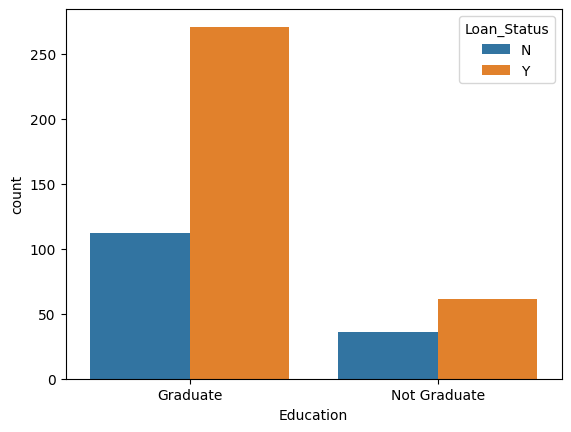

In [14]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

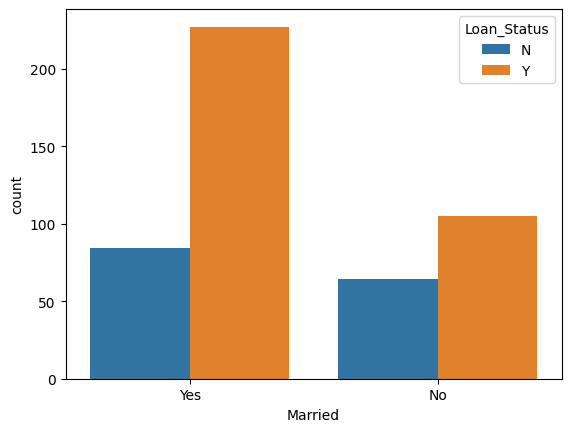

In [15]:
#marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

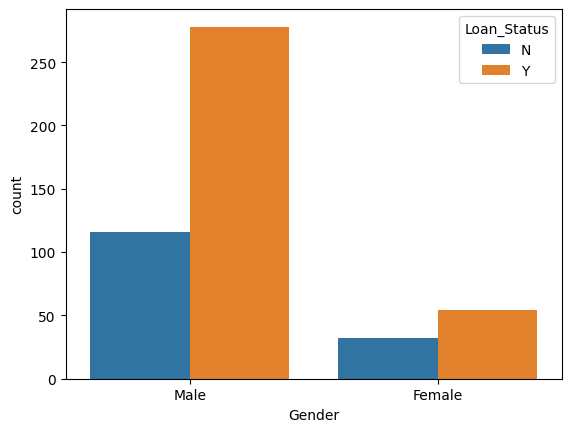

In [16]:
#gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

In [17]:
#convert categorical columns to numerical values
loan_dataset.replace({"Married":{'No':0,'Yes': 1},'Gender':{'Male': 1,'Female': 0},'Self_Employed':{
    'No':0,'Yes': 1
},'Property_Area': {'Rural': 0,'Semiurban':1,'Urban': 2},'Education':{'Graduate': 1,'Not Graduate': 0}},inplace=True)


<ipython-input-17-c4151a4232f4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Married":{'No':0,'Yes': 1},'Gender':{'Male': 1,'Female': 0},'Self_Employed':{


In [18]:
loan_dataset.head()

Loan_ID  Gender  Married  ... Credit_History  Property_Area  Loan_Status
1  LP001003       1        1  ...            1.0              0            N
2  LP001005       1        1  ...            1.0              2            Y
3  LP001006       1        1  ...            1.0              2            Y
4  LP001008       1        0  ...            1.0              2            Y
5  LP001011       1        1  ...            1.0              2            Y

[5 rows x 13 columns]

In [19]:
#separating the data and labels
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

Train Test Split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

Training the model

In [21]:
classifier = svm.SVC(kernel='linear')

In [22]:
#training the svm model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [23]:
#accuracy score on training data
x_train_pred = classifier.predict(x_train)
trda = accuracy_score(x_train_pred,y_train)
print('Training Data Accuracy : ',trda)

Training Data Accuracy :  0.7986111111111112


In [24]:
#accuracy score on test data
x_test_pred = classifier.predict(x_test)
tsda = accuracy_score(x_test_pred,y_test)
print('Test Data Accuracy : ',tsda)

Test Data Accuracy :  0.8333333333333334


Making a predictive system

In [25]:
x_new = x_test.iloc[1]
prediction = classifier.predict(x_new.values.reshape(1,-1))
if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

The loan is approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [28]:
print(y_test.iloc[1])

Y
